### IDs:
Insert yours IDs to the cell below

ID #1: 034537969 

ID #2: 322156159

Ido Hadanny, Ilia Kohanovski

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a scatter plot. If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>

#### 1.A
Data in which the Pearson(x,y)>0.9 but where n-1 points can be selected so that for the vectors restricted to those we have Pearson correlation <0.1

In [2]:
import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt
import pandas as pd

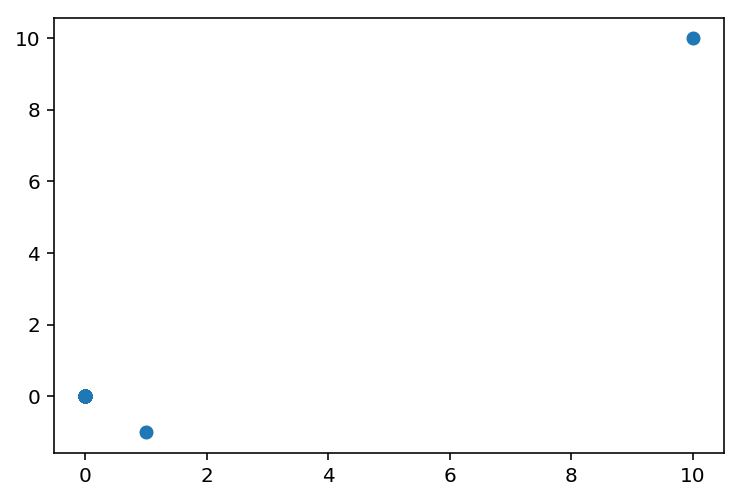

pearson x,y 0.9802057069663801
pearson x[:50], y[:50] -1.0


In [3]:
x = [0]*49 + [1] + [10]
y = [0]*49 + [-1] + [10]
plt.scatter(x, y)
plt.show()
print("pearson x,y", stats.pearsonr(x, y)[0])
print("pearson x[:50], y[:50]", stats.pearsonr(x[:50], y[:50])[0])


#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.4 

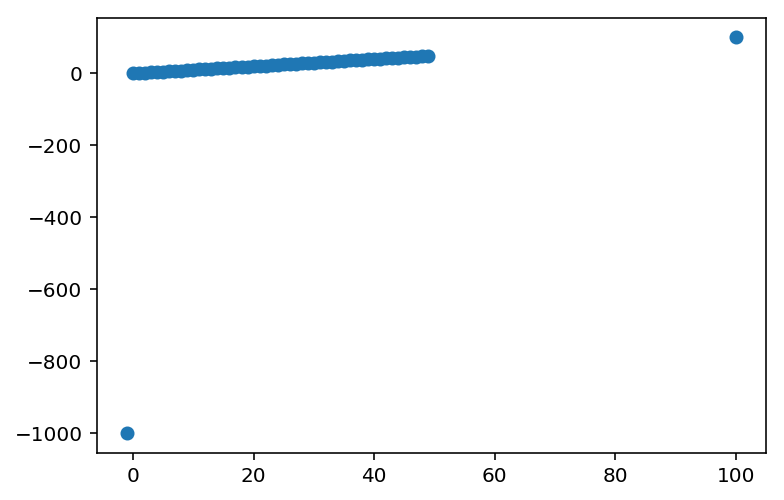

pearsonr 0.3259615672732229
kendalltau 1.0


In [4]:
x = np.array([-1] + list(range(0, 50)) + [100])
y = np.array([-1000] + list(range(0, 50)) + [100])
plt.scatter(x, y)
plt.show()

print("pearsonr", stats.pearsonr(x, y)[0])
print("kendalltau", stats.kendalltau(x, y).correlation)


#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.4 

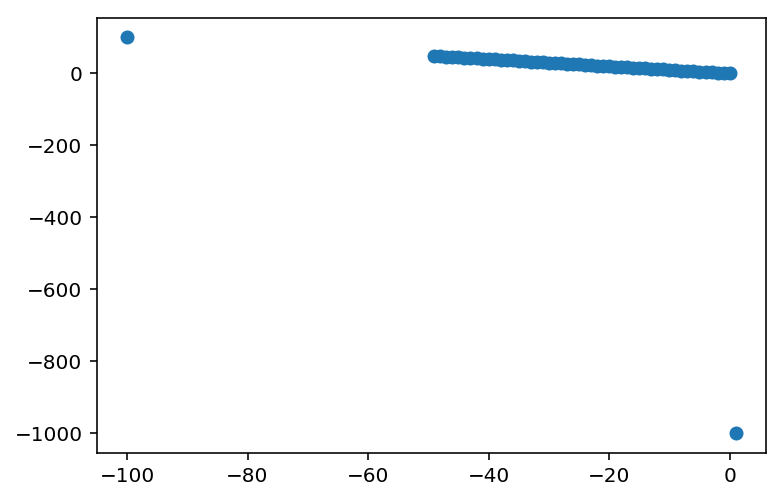

pearsonr -0.3259615672732229
kendalltau -1.0


In [5]:
plt.scatter(-x, y)
plt.show()
print("pearsonr", stats.pearsonr(-x, y)[0])
print("kendalltau", stats.kendalltau(-x, y).correlation)



#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

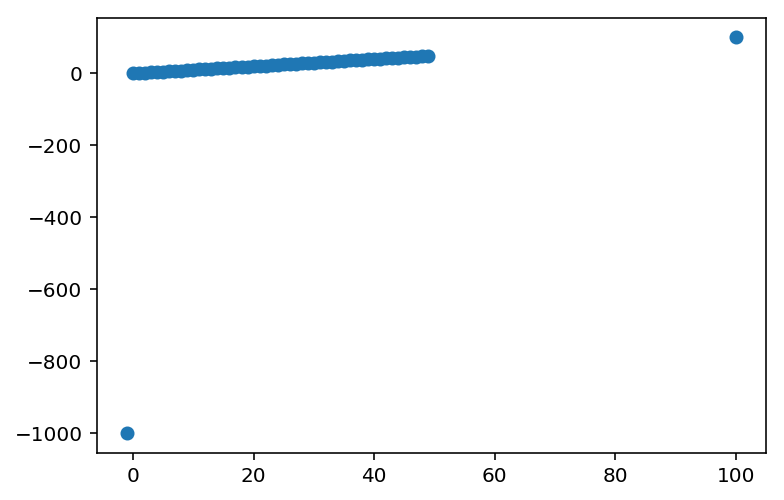

pearsonr 0.3259615672732229
spearman 0.9999999999999999


In [6]:
x = np.array([-1] + list(range(0, 50)) + [100])
y = np.array([-1000] + list(range(0, 50)) + [100])
plt.scatter(x, y)
plt.show()

print("pearsonr", stats.pearsonr(x, y)[0])
print("spearman", stats.spearmanr(x, y).correlation)


#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 1.2

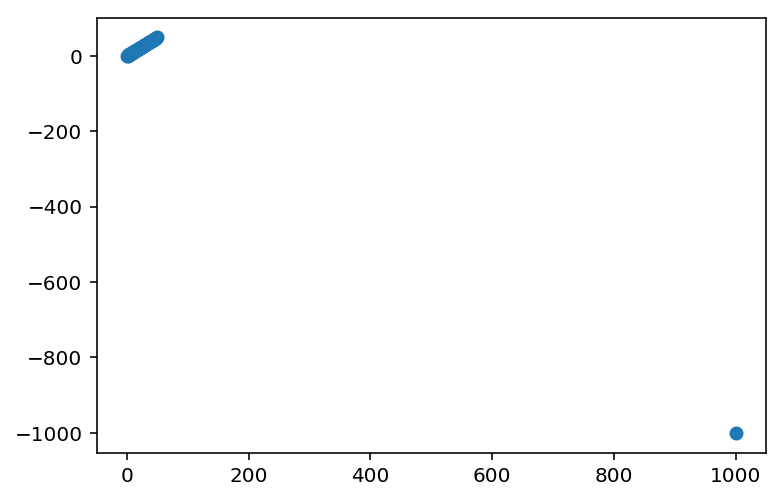

pearsonr -0.9789570033514805
spearman 0.8846153846153845


In [7]:
x = np.array(list(range(0,50)) + [1000])
y = np.array(list(range(0,50)) + [-1000])
plt.scatter(x, y)
plt.show()

print("pearsonr", stats.pearsonr(x, y)[0])
print("spearman", stats.spearmanr(x, y).correlation)


#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

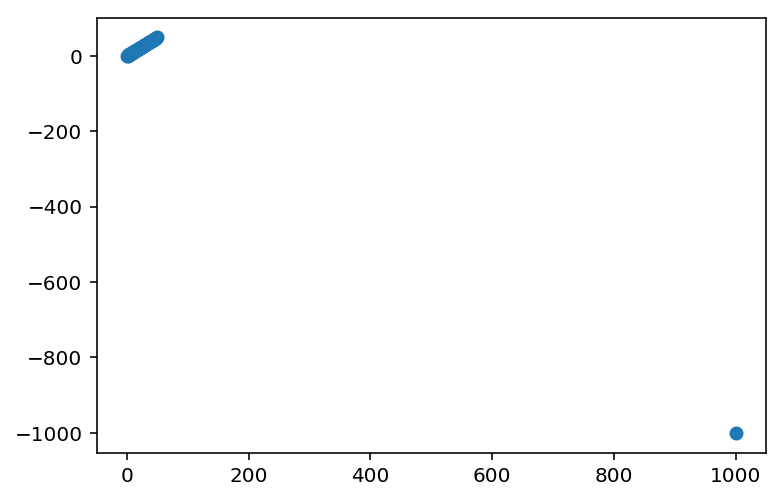

pearsonr -0.9789570033514805
kendalltau 0.9215686274509804


In [8]:
x = np.array(list(range(0,50)) + [1000])
y = np.array(list(range(0,50)) + [-1000])
plt.scatter(x, y)
plt.show()

print("pearsonr", stats.pearsonr(x, y)[0])
print("kendalltau", stats.kendalltau(x, y).correlation)


### Question 2 - Analysis of the Indian Liver Patient Dataset (50 points)

Perform data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Use the following link to find the details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [112]:
df = pd.read_csv(
    'ILPD.csv', names=['age', 'gender', 'tb', 'db', 'alkphos', 
                      'sgpt', 'sgot', 'tp', 'alb', 'ag', 'selector'],
    index_col=False
                )

In [113]:
df.count()

age         583
gender      583
tb          583
db          583
alkphos     583
sgpt        583
sgot        583
tp          583
alb         583
ag          579
selector    583
dtype: int64

In [114]:
df = df.fillna(df.median())

In [115]:
df.groupby('selector').size()

selector
1    416
2    167
dtype: int64

In [116]:
from scipy.stats import norm

gmean = df.groupby('selector').mean()
mean_diff = gmean.loc[1] - gmean.loc[2]
gvar = df.groupby('selector').var()
se = np.sqrt(gvar.loc[1]/416 + gvar.loc[2]/167)
z = mean_diff / se 
z[(0.025 < norm.cdf(z)) & (norm.cdf(z) < 0.975)]

tp   -0.855005
dtype: float64

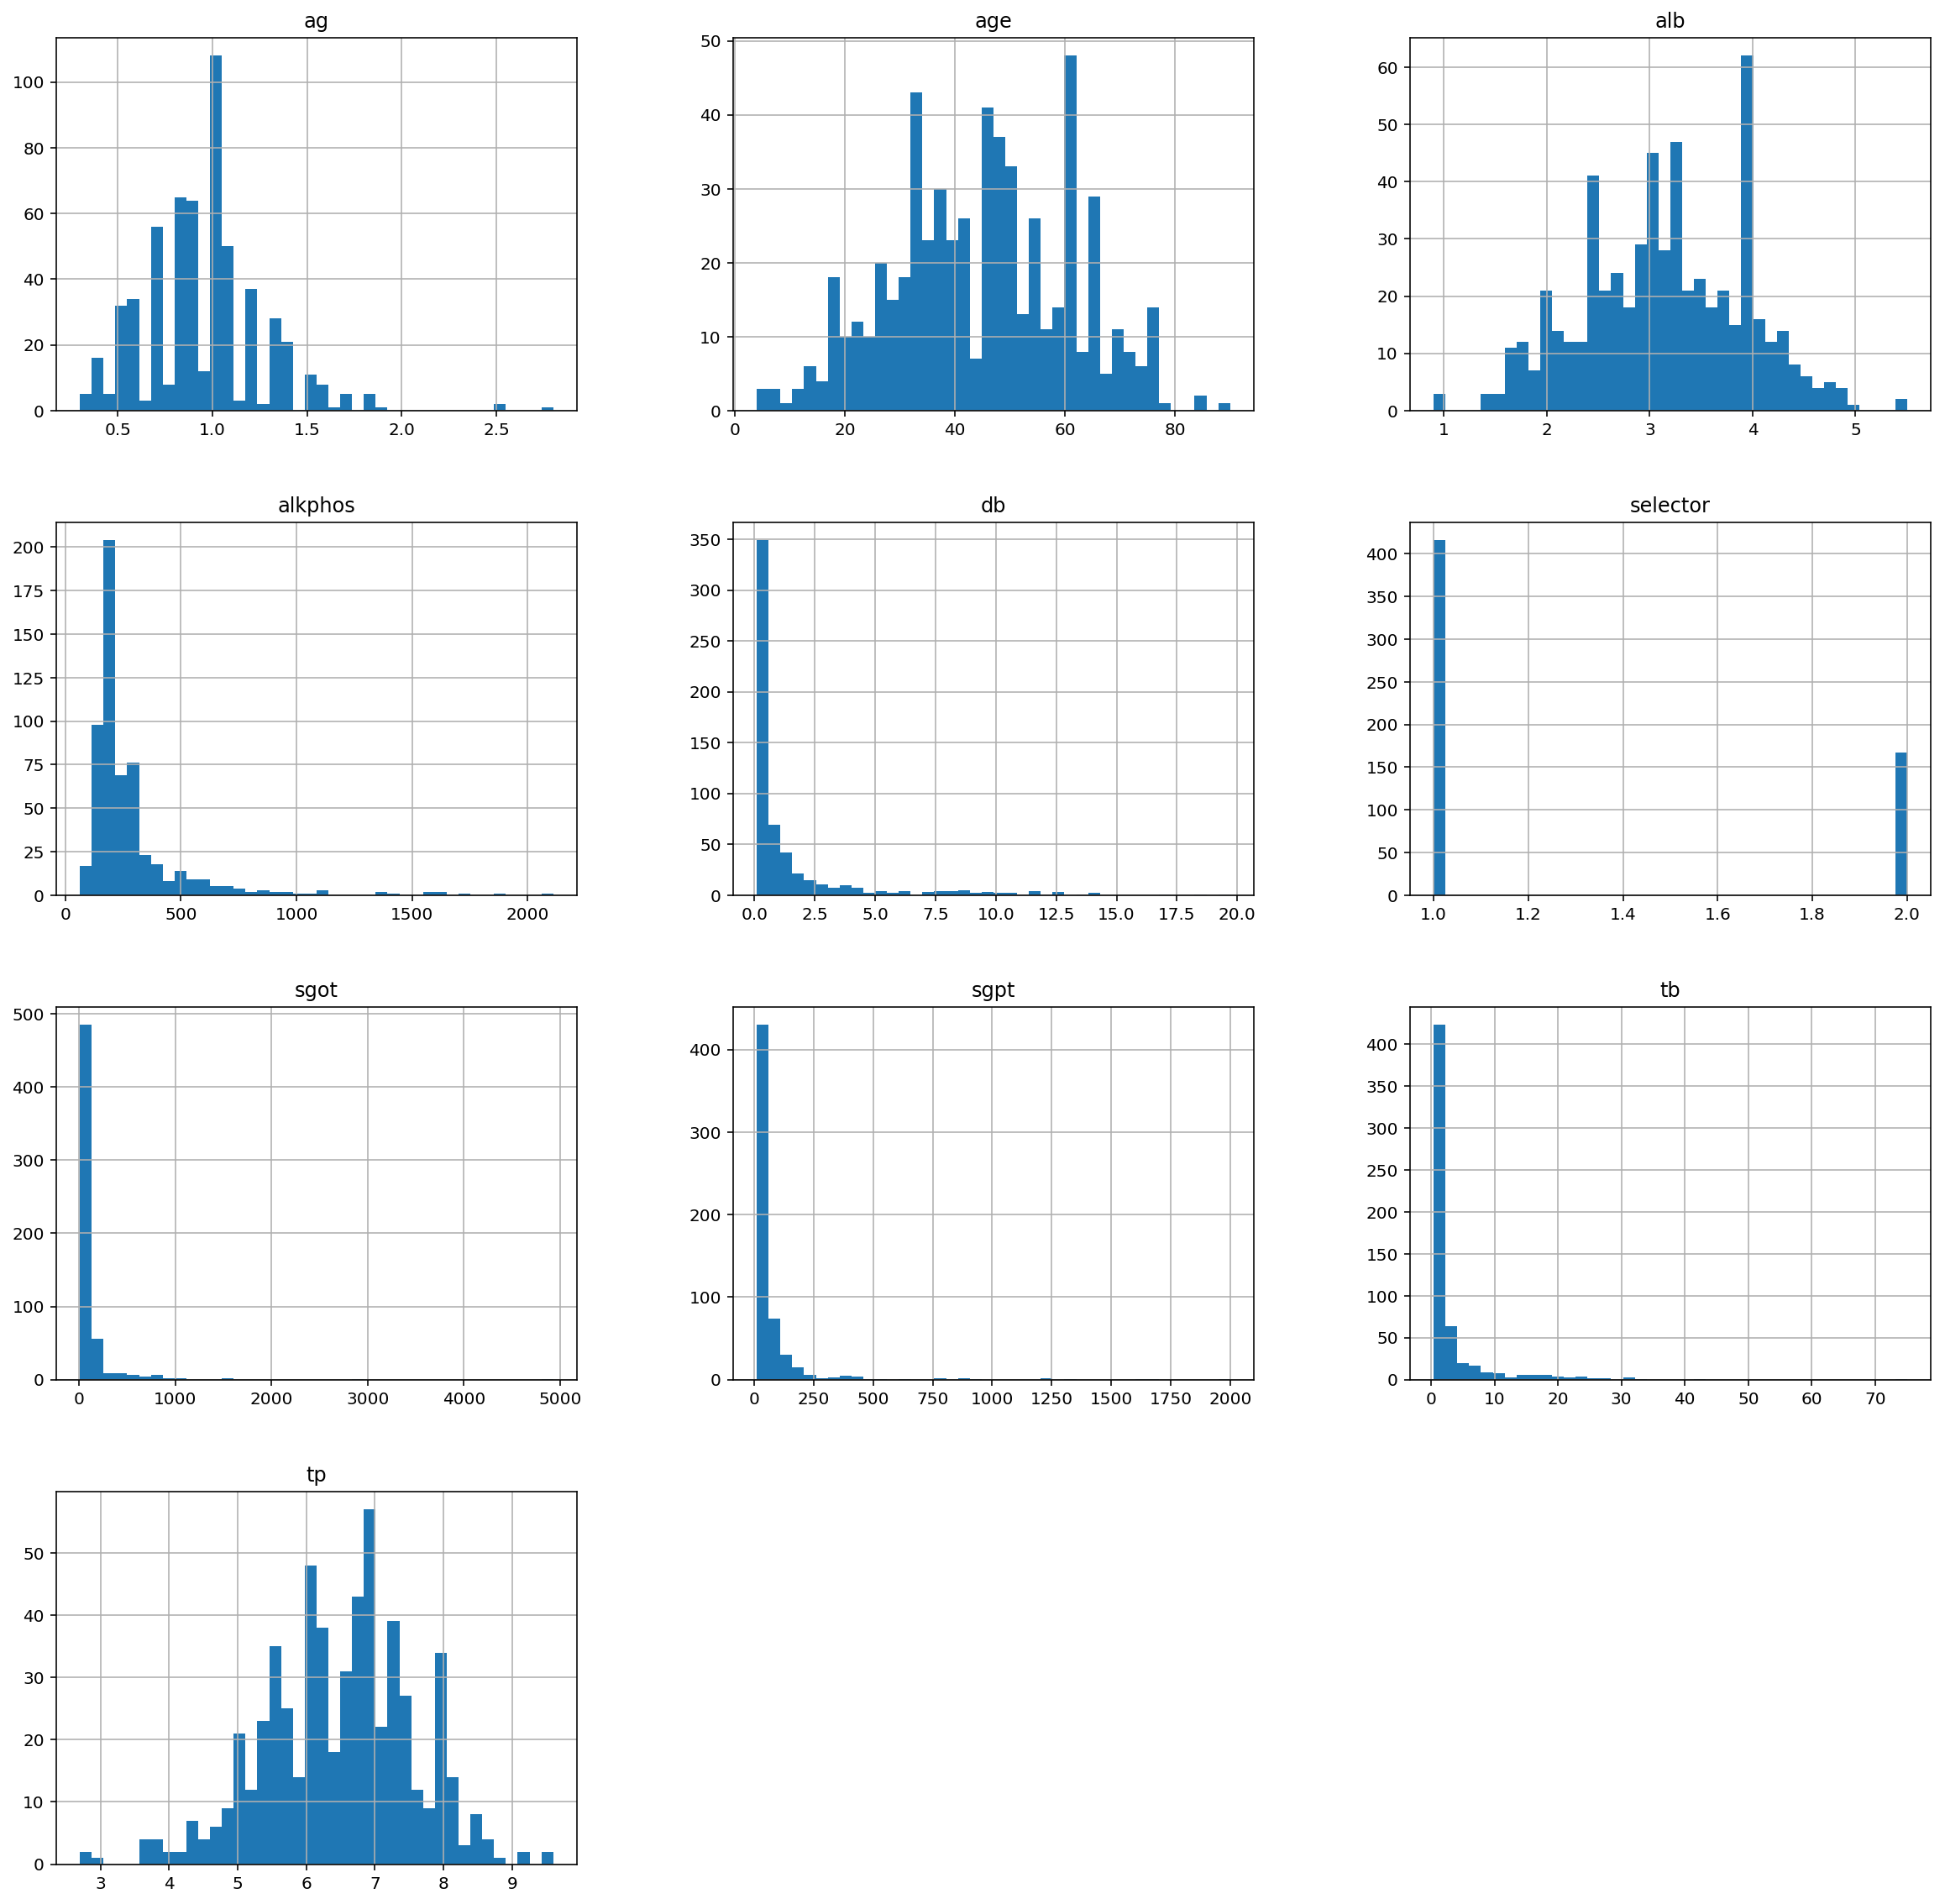

In [138]:
df.hist(figsize=(20,20),bins=40)
plt.show()

In [143]:
for col in set(df.columns) - set(['gender', 'selector']):
    print(df[col][:4])

0    0.90
1    0.74
2    0.89
3    1.00
Name: ag, dtype: float64
0    16
1    64
2    60
3    14
Name: sgpt, dtype: int64
0    65
1    62
2    62
3    58
Name: age, dtype: int64
0    0.1
1    5.5
2    4.1
3    0.4
Name: db, dtype: float64
0    3.3
1    3.2
2    3.3
3    3.4
Name: alb, dtype: float64
0     0.7
1    10.9
2     7.3
3     1.0
Name: tb, dtype: float64
0    187
1    699
2    490
3    182
Name: alkphos, dtype: int64
0     18
1    100
2     68
3     20
Name: sgot, dtype: int64
0    6.8
1    7.5
2    7.0
3    6.8
Name: tp, dtype: float64


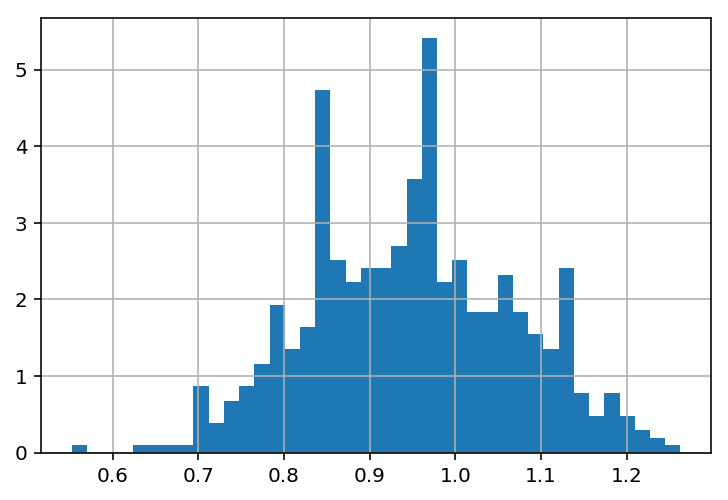

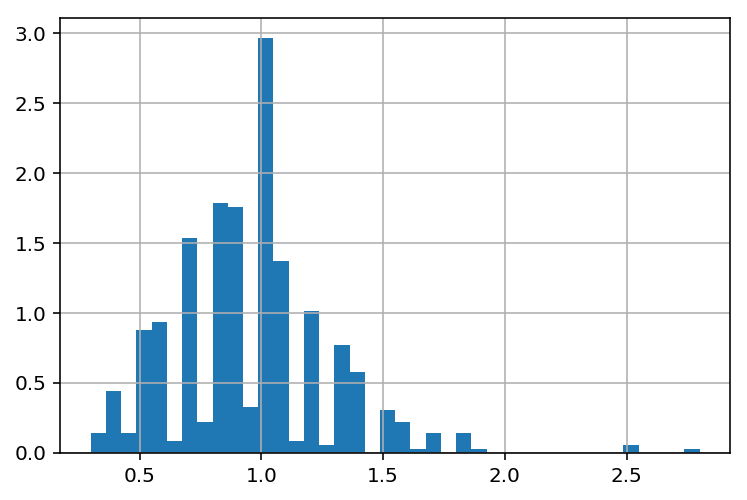

In [551]:
col='ag'
feat = df[col]
# feat = np.log(feat)
bins = 40
u = feat.mean()
s = np.sqrt(((feat - u)**2).mean())

generated = stats.poisson(60).rvs(size=583)
generated = [round(g,2) for g in generated]
generated = np.array(generated)/(60/u)
pd.Series(generated).hist(bins=bins, density=1);
plt.figure()
feat.hist(bins=bins,density=1);


In [542]:
u

0.9469468267581475

In [455]:
feat[0:4]

0    3.3
1    3.2
2    3.3
3    3.4
Name: alb, dtype: float64

In [460]:
feat2/feat

0      0.272727
1      0.231250
2      0.269697
3      0.294118
4      0.166667
5      0.295455
6      0.285714
7      0.305556
8      0.292683
9      0.294118
10     0.296296
11     0.200000
12     0.264706
13     0.243902
14     0.322222
15     0.304348
16     0.295455
17     0.262857
18     0.258065
19     0.258065
20     0.211538
21     0.208333
22     0.290323
23     0.375000
24     0.474359
25     0.407407
26     0.407407
27     0.300000
28     0.500000
29     0.343750
         ...   
553    0.222222
554    0.266667
555    0.233333
556    0.322581
557    0.322581
558    0.275000
559    0.192308
560    0.181818
561    0.200000
562    0.192308
563    0.192308
564    0.310345
565    0.219048
566    0.250000
567    0.229412
568    0.291429
569    0.300000
570    0.346154
571    0.233333
572    0.625000
573    0.210526
574    0.208333
575    1.000000
576    0.318182
577    0.346154
578    0.231250
579    0.343750
580    0.312500
581    0.294118
582    0.340909
Length: 583, dtype: floa

In [107]:
log_normal = ['alkphos', 'db', 'sgot', 'sgpt', 'tb']
# df[log_normal] = np.log(df[log_normal])

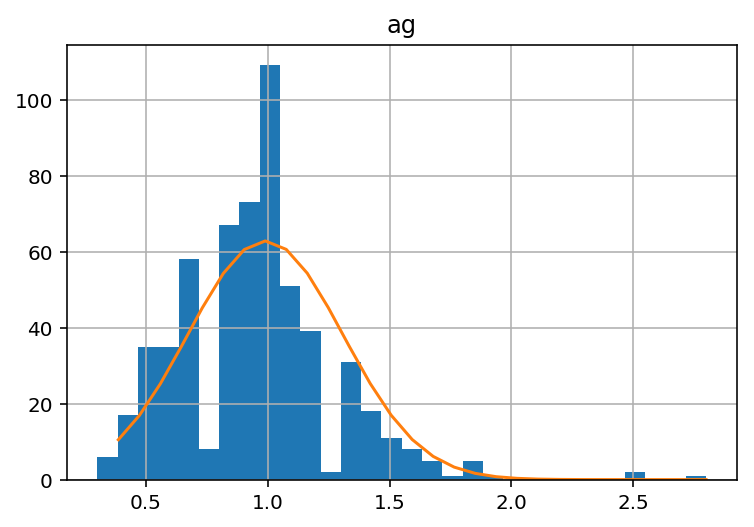

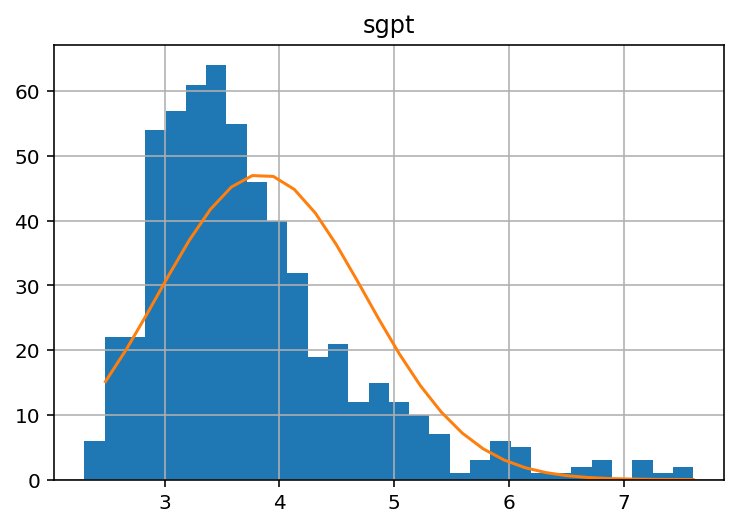

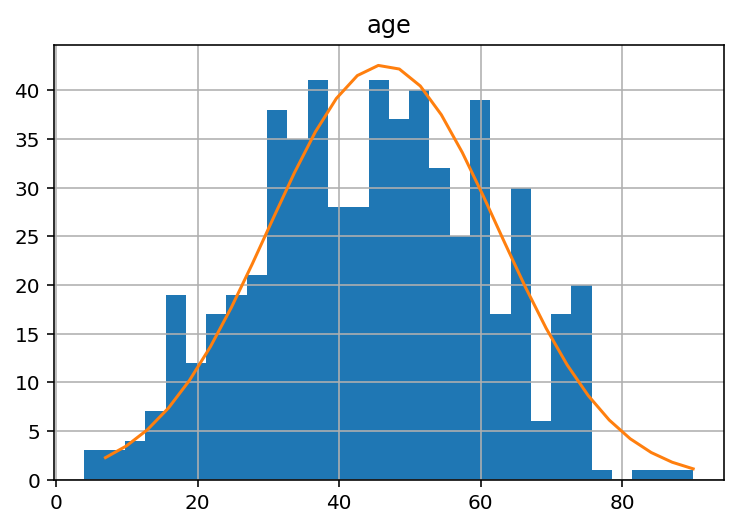

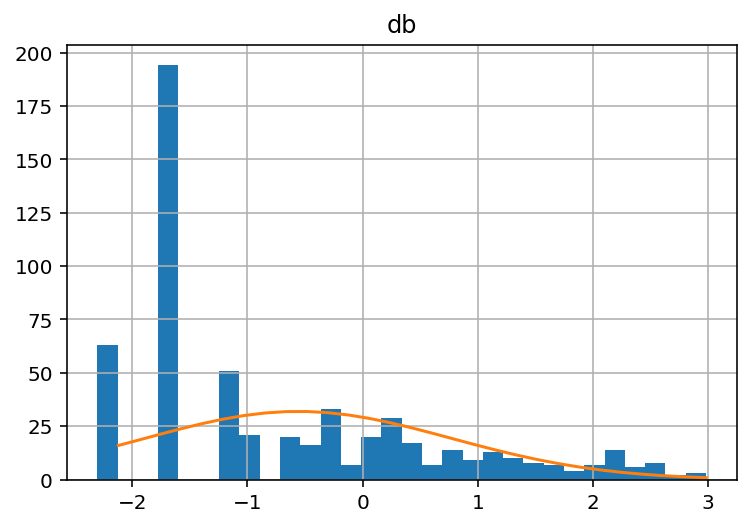

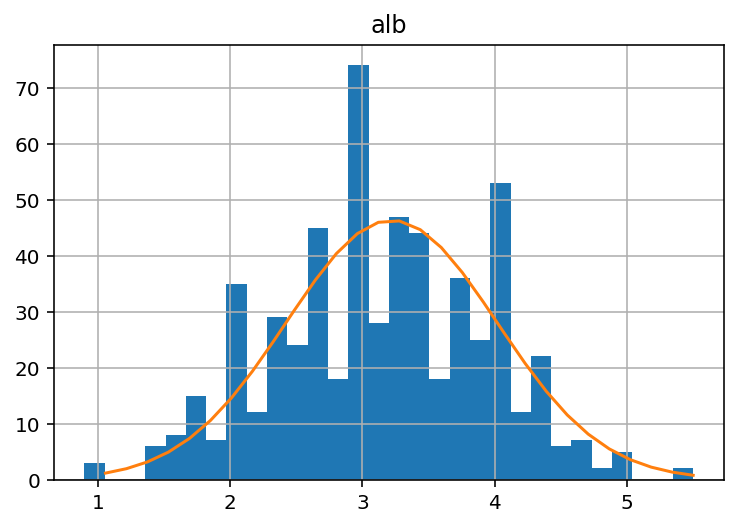

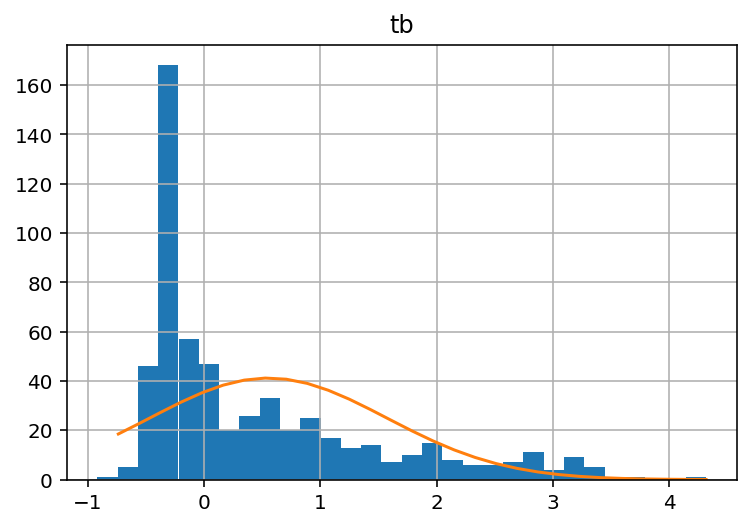

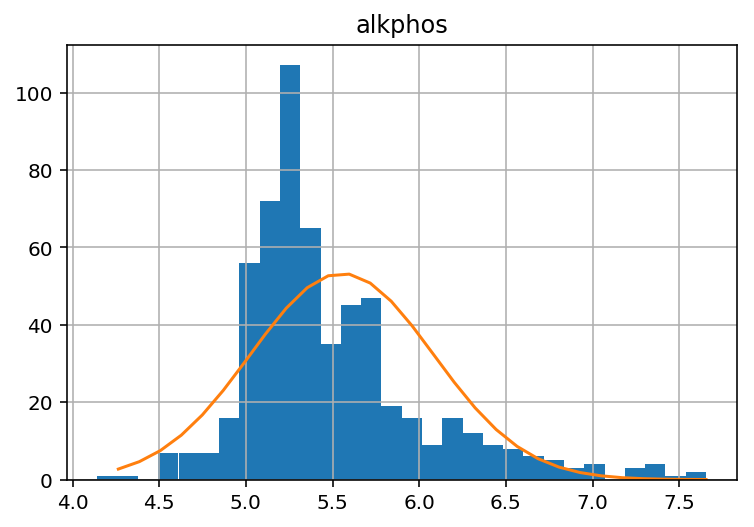

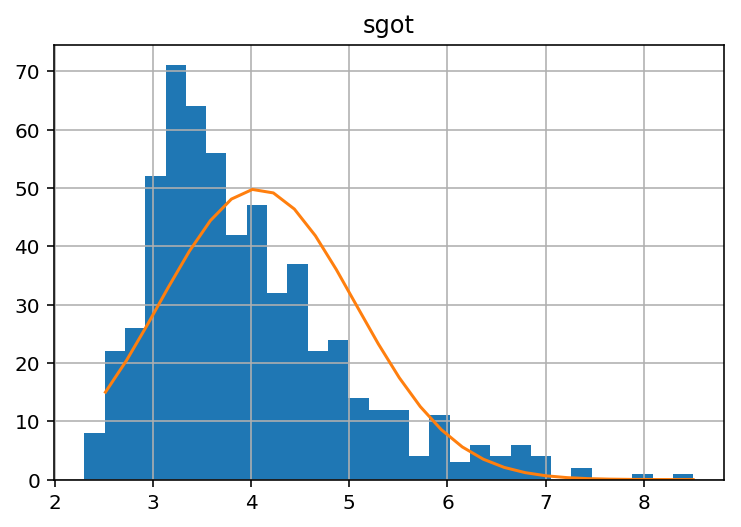

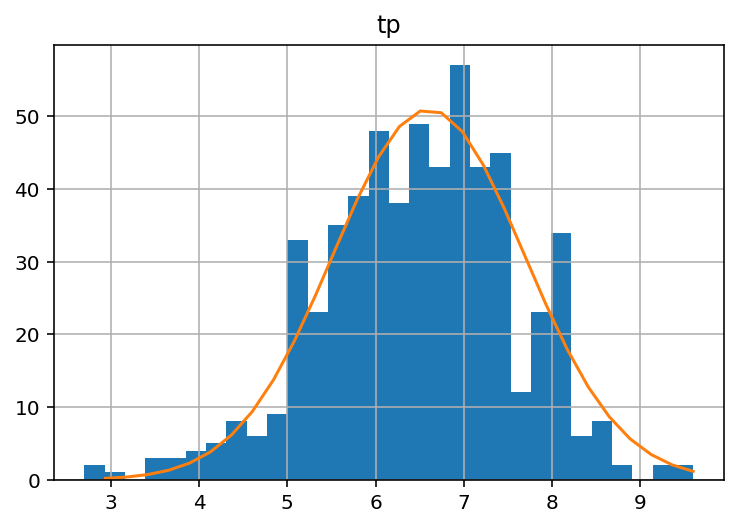

In [37]:
for col in set(df.columns) - set(['gender', 'selector']):
    feat = df[col]
    bins = 30
    u = feat.mean()
    s = np.sqrt(((feat - u)**2).mean())
    feat.hist(bins=bins)
    x = np.linspace(feat.min(), feat.max(), bins)
    ser = norm.cdf((x-u)/s)*feat.count()
    plt.plot(x[1:], ser[1:] - ser[:-1])
    plt.title(col)
    plt.show()

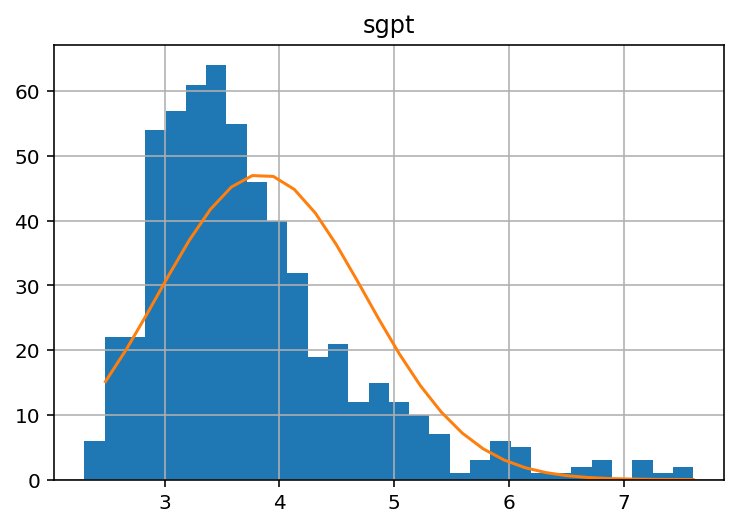

In [125]:
col='sgpt'
feat = df[col]
feat = np.log(feat)
bins = 30
u = feat.mean()
s = np.sqrt(((feat - u)**2).mean())
feat.hist(bins=bins)
x = np.linspace(feat.min(), feat.max(), bins)
ser = norm.cdf((x-u)/s)*feat.count()
plt.plot(x[1:], ser[1:] - ser[:-1])
plt.title(col)
plt.show()

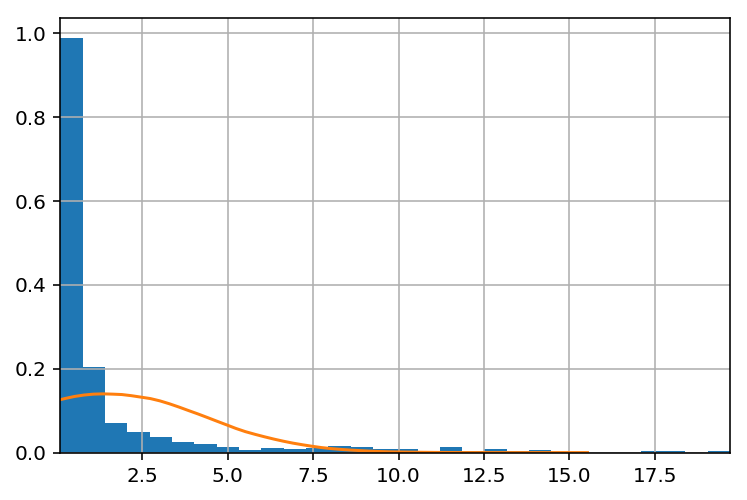

In [137]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

col='db'
feat = df[col]
# feat = np.log(feat)
bins = 30
u = feat.mean()
s = np.sqrt(((feat - u)**2).mean())
feat.hist(bins=bins,density=1)
generated = stats.norm(u,s).rvs(size=100000)
sns.distplot(generated,bins=30,hist=False,norm_hist=True);
plt.xlim(feat.min(),feat.max());

(0, 11)

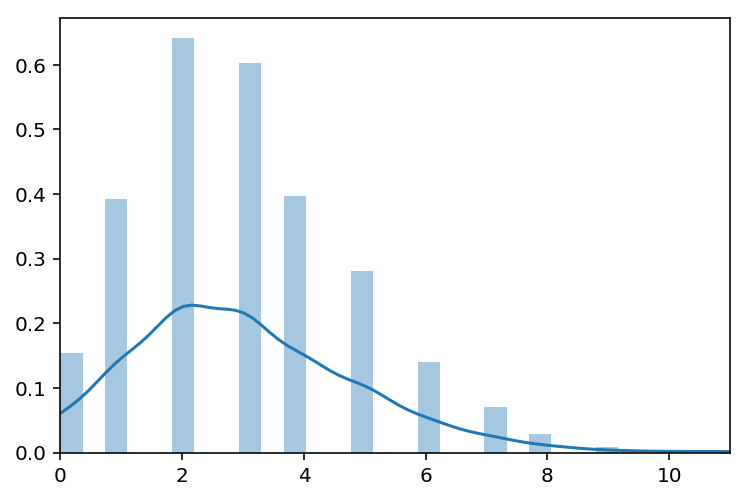

In [106]:
generated = stats.poisson(3).rvs(size=583)
sns.distplot(generated,bins=30,hist=True,norm_hist=True);
plt.xlim(generated.min(),generated.max())


In [ ]:
import seaborn as sns
corr = df.drop('selector', axis=1).corr()
def corr_heat_map(corr):
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
corr_heat_map(corr)

In [ ]:
sig_corr = corr[abs(corr) > 0.5].stack().reset_index(name='my_corr')
sig_corr = sig_corr.query('level_0 < level_1').sort_values('my_corr')
sig_corr

In [ ]:
for _, (feat_a, feat_b, my_corr) in sig_corr.iterrows():
    x, y = df[feat_a], df[feat_b]
    means = [x.mean(), y.mean()]
    cov = np.cov([x, y])
    g = sns.jointplot(x, y)
    plot_2d_Gaussian_pdf(means, cov, g.ax_joint)
    g.fig.suptitle(f"{feat_a}-{feat_b} corr:{my_corr}")
    plt.show()

In [ ]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov, ax = None):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    if ax is None:
        fig, ax = plt.subplots()
        ax.axis('equal')
        ax.grid(alpha=0.2)
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    return ax


### Question 3 - Log Normal (15 points)

Consider Y1 ~ LogNormal(0,0.25) (recall that μ and σ are the mean and std of the underlying normal distribution)  and Y2 ~ LogNormal(0,1).

#### 3.A
Draw a plot of the pdfs for Y1 and Y2 on the same axes, over the x range of [0 10].

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
y1 = stats.lognorm(s=0.25)
y2 = stats.lognorm(s=1)
y1rvs = y1.rvs(size=10000)
y2rvs = y2.rvs(size=10000)
plt.xlim(0,10)
sns.distplot(y1rvs,bins=200,hist=False,label='Y1 pdf');
plt.xlim(0,10)
sns.distplot(y2rvs,bins=200,hist=False,label='Y2 pdf');

#### 3.B
What is E(Y1)? E(Y2)?

In [ ]:
print('E(Y1):',y1.mean())
print('E(Y2):',y2.mean()) #e^0.5

#### 3.C
What is the probability of Y1 being more than 4 stds larger than its mean?

In [ ]:
1-y1.cdf(4*y1.mean())
#equals to 1-stats.norm(0,0.25).cdf(np.log(4*y1.mean()))

#### 3.D
What is the probability of Y2 being more than 4 stds larger than its mean?

In [ ]:
1-y2.cdf(4*y2.mean())

#### 3.E
What is the IQR of Y1? Of Y2?

In [ ]:
print('Y1 iqr:',y1.ppf(0.75)-y1.ppf(0.25))
print('Y2 iqr:',y2.ppf(0.75)-y2.ppf(0.25))

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.5 & 0.2 & 0.05 & 0 & 0.05 & 0.2 \\
0.2 & 0.5 & 0.2 & 0.05 & 0 & 0.05 \\
0.05 & 0.2 & 0.5 & 0.2 & 0.05 & 0 \\
0 & 0.05 & 0.2 & 0.5 & 0.2 & 0.05 \\
0.05 & 0 & 0.05 & 0.2 & 0.5 & 0.2 \\
0.2 & 0.05 & 0 & 0.05 & 0.2 & 0.5
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 20.
1. What do you expect the average value of all 20 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.B
Construct 1000 trajectories, each of length 2000.
1. What do you expect the average value of all 2000 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D - Bonus
Can you try to formulate a CLT for Markov chains from your findings?